In [1]:
import re
import string
import pandas as pd
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap
import numpy as np
import time
import umap.plot
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

c:\Users\pedro\Desktop\coding\NLP\.venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

1. Escolha 10 documentos da base, e determine seu documento mais parecido (que não pode ser ele mesmo), usando:<br>
a) Representação vetorial CountVectorizer com similaridade do cosseno;<br>
b) Representação vetorial TF-IDF com similaridade do cosseno.

In [2]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
# remove html symbols
df['text'] = df['text'].apply(lambda row: re.sub('\<[^>]*\>', ' ', row))
df['text'] = df['text'].apply(lambda row: re.sub('\&[^;]*\;', ' ', row))

stop_words = set(nltk.corpus.stopwords.words("english"))

df['text'] = df['text'].apply(lambda row: re.sub('\d', '', row).lower())
df['text'] = df['text'].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))

temp = df['text'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['text'] = temp.apply(lambda x: " ".join(x))

vectorizer = TfidfVectorizer()
all_texts = vectorizer.fit_transform(df['text'][:1000])
selected_texts = all_texts[:10]

for j in range(selected_texts.shape[0]):
    temp = 1
    aux = None
    for i in range(all_texts.shape[0]):
        d = distance.cosine(all_texts.toarray()[i].tolist(), selected_texts.toarray()[j].tolist())
        
        if d < temp and df['text'].iloc[j] != df['text'].iloc[i] and d != 0:
            temp = d
            aux = i
    print('text '+str(temp))
    print(df['text'].iloc[j])
    print('\nmost similar text')
    print(df['text'].iloc[aux]+'\n\n')


text 0.8406616252403291
leads say using c x know c fast lots libs available might also dislike java cl every engineering decision perfect lots factors play attempts combine best c speed best scripting languages easy things fast without pay attention opinion end merely joining worst worlds rather best worlds pay attention things needless complexity memory management etc reason put things get speed get adequate speed without nobody cares besides programming specific really want code stuff without worry details programming getting results nobody cares details level programming language minutuae care effort put quality speed results coming ratio

most similar text
prepaid starts thats mb g speed unlimited g speed afterwards gets like gb g personally happy use cases vary


text 0.8791489544603687
would like point counterexamples « think journalists many losing jobs newspapers barely surviving old days every news event probably hundreds journalists writing story local newspapers efficiency i

In [3]:
vectorizer = CountVectorizer()
all_texts = vectorizer.fit_transform(df['text'][:1000])
selected_texts = all_texts[:10]

for j in range(selected_texts.shape[0]):
    temp = 1
    aux = None
    for i in range(all_texts.shape[0]):
        d = distance.cosine(all_texts.toarray()[i].tolist(), selected_texts.toarray()[j].tolist())
        
        if d < temp and df['text'].iloc[j] != df['text'].iloc[i] and d != 0:
            temp = d
            aux = i
    print('text '+str(temp))
    print(df['text'].iloc[j])
    print('\nmost similar text')
    print(df['text'].iloc[aux]+'\n\n')

text 0.8398718461949128
leads say using c x know c fast lots libs available might also dislike java cl every engineering decision perfect lots factors play attempts combine best c speed best scripting languages easy things fast without pay attention opinion end merely joining worst worlds rather best worlds pay attention things needless complexity memory management etc reason put things get speed get adequate speed without nobody cares besides programming specific really want code stuff without worry details programming getting results nobody cares details level programming language minutuae care effort put quality speed results coming ratio

most similar text
nintendo going patch eventually devs want give help speed probably get writeup patched


text 0.757686986873847
would like point counterexamples « think journalists many losing jobs newspapers barely surviving old days every news event probably hundreds journalists writing story local newspapers efficiency internet search engines

2. Elabore um problema de classificação binária de textos coerente com sua base.
a) Determine o rótulo dos documentos (separando os documentos em classes bem definidas).

In [4]:
data = df[['text', 'type']][:200]
temp = df[['text', 'type']][200:]
data = pd.concat([data, temp.loc[temp['type'] == 'story']])
# comment -> 0
# story -> 1

y = [0 if i == 'comment' else 1 for i in data['type']]

b) Extraia as representações vetoriais com CountVectorizer e TF-IDF.

In [5]:
count_vectorizer = CountVectorizer()
tfid_vectorizer = TfidfVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(data['text'])
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

c) Treine um classificador baseado em cada uma das duas representações vetoriais e Regressão Logística usando validação cruzada com 70% das amostras selecionadas para treino e 30% para teste. Exiba as matrizes de confusão, métricas de acurácia, precisão, recall e F1 score.

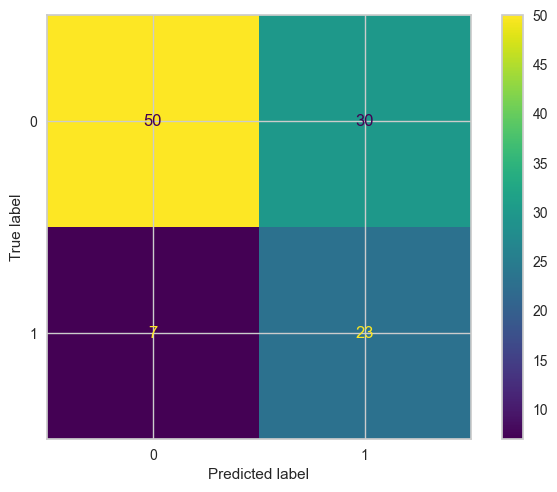

In [6]:
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(x_count_vectorizer, y, test_size=0.3)
X_train_tfid, X_test_tfid, y_train_tfid, y_test_tfid = train_test_split(x_tfid_vectorizer, y, test_size=0.3)

model = LogisticRegression(class_weight="balanced").fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

cm = confusion_matrix(pred, y_test_count)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [7]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.5542168674698795
recall 0.4339622641509434
precisao 0.7666666666666667
acuracia 0.6636363636363637


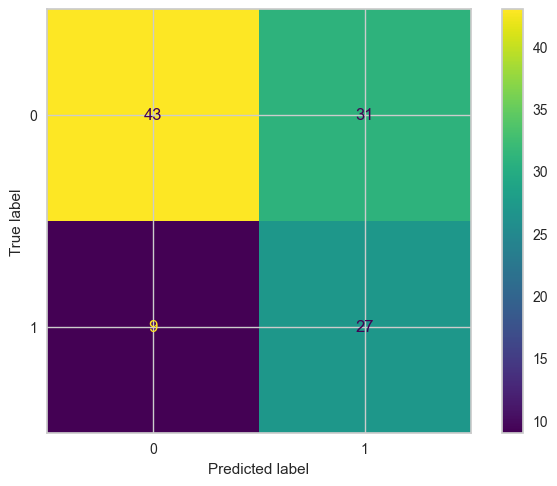

In [8]:
model = LogisticRegression(class_weight="balanced").fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

cm = confusion_matrix(pred, y_test_tfid)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [9]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.574468085106383
recall 0.46551724137931033
precisao 0.75
acuracia 0.6363636363636364


d) Faça o mesmo para o classificador Naive-Bayes.

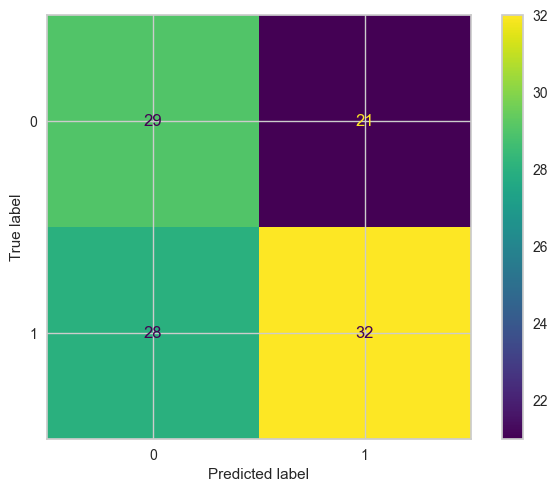

In [10]:
model = GaussianNB().fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

cm = confusion_matrix(pred, y_test_count)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [11]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.5663716814159292
recall 0.6037735849056604
precisao 0.5333333333333333
acuracia 0.5545454545454546


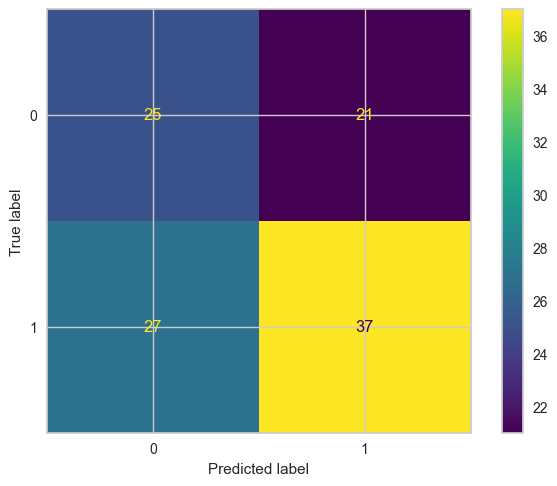

In [12]:
model = GaussianNB().fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

cm = confusion_matrix(pred, y_test_tfid)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [13]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.6065573770491803
recall 0.6379310344827587
precisao 0.578125
acuracia 0.5636363636363636


e) Faça o mesmo para um outro classificador de sua preferencia (pesquise na biblioteca Scikit-learn).

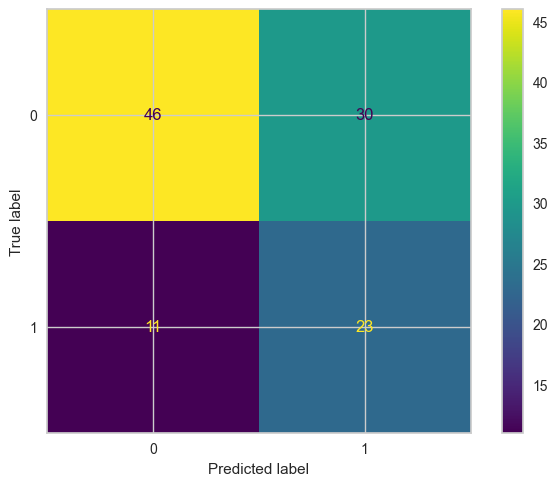

In [14]:
model = svm.SVC(class_weight="balanced").fit(X_train_count.toarray(), y_train_count)
pred = model.predict(X_test_count.toarray())

cm = confusion_matrix(pred, y_test_count)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [15]:
print('F1 score '+str(f1_score(y_test_count, pred)))
print('recall '+str(recall_score(y_test_count, pred)))
print('precisao '+str(precision_score(y_test_count, pred)))
print('acuracia '+str(accuracy_score(y_test_count, pred)))

F1 score 0.5287356321839081
recall 0.4339622641509434
precisao 0.6764705882352942
acuracia 0.6272727272727273


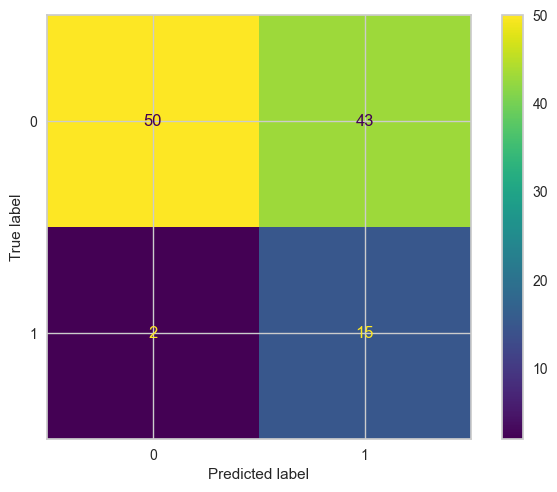

In [16]:
model = svm.SVC(class_weight="balanced").fit(X_train_tfid.toarray(), y_train_tfid)
pred = model.predict(X_test_tfid.toarray())

cm = confusion_matrix(pred, y_test_tfid)
pl = ConfusionMatrixDisplay(cm)
pl.plot()

In [17]:
print('F1 score '+str(f1_score(y_test_tfid, pred)))
print('recall '+str(recall_score(y_test_tfid, pred)))
print('precisao '+str(precision_score(y_test_tfid, pred)))
print('acuracia '+str(accuracy_score(y_test_tfid, pred)))

F1 score 0.4
recall 0.25862068965517243
precisao 0.8823529411764706
acuracia 0.5909090909090909


3. Realize um comparativo entre os métodos LDA, SVD e NMF para realizar modelagem de tópicos. Para cada método:<br>
a) empiricamente, tente identificar uma quantidade de tópicos adequada para seu problema. Exiba resultados que justifiquem a quantidade de tópicos escolhida;<br>
b) identifique as 5 palavras mais relevantes de cada tópico;<br>
c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você pode representar os tópicos por suas 5 palavras mais relevantes).<br>
d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.<br><br>
NMF apresenta melhor resultado, já 

In [19]:
n = 5
docs = data['text'][:5]
lda = LatentDirichletAllocation(n_components=n)
svd = TruncatedSVD(n_components=n)
model = NMF(n_components=n)

tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

lda.fit(x_tfid_vectorizer)
svd.fit(x_tfid_vectorizer)
model.fit(x_tfid_vectorizer)

print('LDA')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names_out()[j] for j in lda.components_[i].argsort()[:-5:-1]]))


res = lda.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

LDA
0 ['would', 'find', 'good', 'design']
1 ['thanks', 'like', 'much', 'buy']
2 ['people', 'one', 'new', 'im']
3 ['time', 'get', 'use', 'would']
4 ['anyone', 'like', 'sounds', 'really']
leads say using c x know c fast lots libs available might also dislike java cl every engineering decision perfect lots factors play attempts combine best c speed best scripting languages easy things fast without pay attention opinion end merely joining worst worlds rather best worlds pay attention things needless complexity memory management etc reason put things get speed get adequate speed without nobody cares besides programming specific really want code stuff without worry details programming getting results nobody cares details level programming language minutuae care effort put quality speed results coming ratio
[0.02426465 0.02424142 0.02426518 0.02422967 0.90299909]


would like point counterexamples « think journalists many losing jobs newspapers barely surviving old days every news event proba

In [20]:
tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

print('SVD')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names_out()[j] for j in svd.components_[i].argsort()[:-5:-1]]))


res = svd.fit_transform(tfid_vectorizer.fit_transform(docs))

for i, doc in enumerate(docs):
    print(doc)
    print(res[i])
    print('\n')

SVD
0 ['would', 'like', 'get', 'people']
1 ['people', 'world', 'http', 'company']
2 ['sounds', 'company', 'please', 'link']
3 ['app', 'work', 'apps', 'anyone']
4 ['world', 'http', 'would', 'much']
leads say using c x know c fast lots libs available might also dislike java cl every engineering decision perfect lots factors play attempts combine best c speed best scripting languages easy things fast without pay attention opinion end merely joining worst worlds rather best worlds pay attention things needless complexity memory management etc reason put things get speed get adequate speed without nobody cares besides programming specific really want code stuff without worry details programming getting results nobody cares details level programming language minutuae care effort put quality speed results coming ratio
[ 5.48872886e-01  3.27812759e-01 -1.58587403e-16  6.32225799e-01
 -4.37684691e-01]


would like point counterexamples « think journalists many losing jobs newspapers barely surv

In [21]:
tfid_vectorizer = TfidfVectorizer()
x_tfid_vectorizer = tfid_vectorizer.fit_transform(data['text'])

print('NMF')
for i in range(n):
    print(str(i)+' '+str([tfid_vectorizer.get_feature_names_out()[j] for j in model.components_[i].argsort()[:-5:-1]]))


res = model.fit_transform(tfid_vectorizer.fit_transform(docs))
for i, doc in enumerate(docs):
    print(doc)
    print(res[0][i])
    print('\n')

NMF
0 ['work', 'something', 'get', 'things']
1 ['people', 'use', 'world', 'drown']
2 ['sounds', 'company', 'good', 'please']
3 ['app', 'anyone', 'thanks', 'site']
4 ['would', 'time', 'data', 'much']
leads say using c x know c fast lots libs available might also dislike java cl every engineering decision perfect lots factors play attempts combine best c speed best scripting languages easy things fast without pay attention opinion end merely joining worst worlds rather best worlds pay attention things needless complexity memory management etc reason put things get speed get adequate speed without nobody cares besides programming specific really want code stuff without worry details programming getting results nobody cares details level programming language minutuae care effort put quality speed results coming ratio
0.47962145006880175


would like point counterexamples « think journalists many losing jobs newspapers barely surviving old days every news event probably hundreds journalists

4. Realize um agrupamento dos dados usando a representação do CountVectorizer, seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a dimensão resultante dos dados projetados?

In [22]:
df = pd.read_csv('dataset/hacker_news_sample.csv')
df = df.dropna(subset=['text'])
# remove html symbols
df['text'] = df['text'].apply(lambda row: re.sub('\<[^>]*\>', ' ', row))
df['text'] = df['text'].apply(lambda row: re.sub('\&[^;]*\;', ' ', row))

stop_words = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.PorterStemmer()

df['text'] = df['text'].apply(lambda row: re.sub('\d', '', row).lower())
df['text'] = df['text'].apply(lambda row: row.translate(str.maketrans('', '', string.punctuation)))

temp = df['text'].apply(lambda row: [x for x in nltk.word_tokenize(row) if x not in stop_words])
df['text'] = temp.apply(lambda x: " ".join(x))

temp2 = df['text'].apply(lambda row: [stemmer.stem(x) for x in nltk.word_tokenize(row)])
df['text'] = temp2.apply(lambda x: " ".join(x))

count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(df['text'])

In [23]:
pca = PCA(n_components=0.95).fit_transform(x_count_vectorizer.toarray())
pca.shape[1]

2483

b) Aplique um algoritmo k-means nos dados projetados, tentando usar o método elbow para encontrar o valor de k ́otimo.

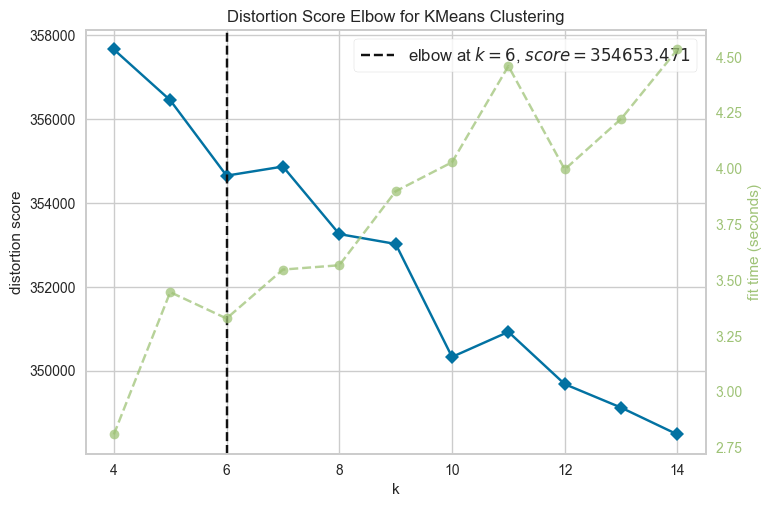

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,15))

visualizer.fit(pca)
visualizer.show()

5. Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP na representação CountVectorizer e plote os gráfico das projeções resultantes, colorindo os pontos de acordo com os grupos obtidos pelo k-means (questão 4b).<br>
b) Experimente variar os hiperparâmetros perplexity do t-SNE e n neighbors do UMAP. O que acontece com as projeções quando estes parâmetros são calibrados para valores menores ou maiores do que seus valores padrão?<br>
c) Usando os melhores valores encontrados para perplexity e n neighbors, compare o tempo de execução e a qualidade visual da projeção dos 2 métodos de projeção multidimensional (t-SNE e UMAP). Qual abordagem se saiu melhor em cada um desses aspectos?<br><br>
o tempo de execução é semelhante, o TSNE com perplexity 200 separa melhor os grupos

35.482250928878784 s


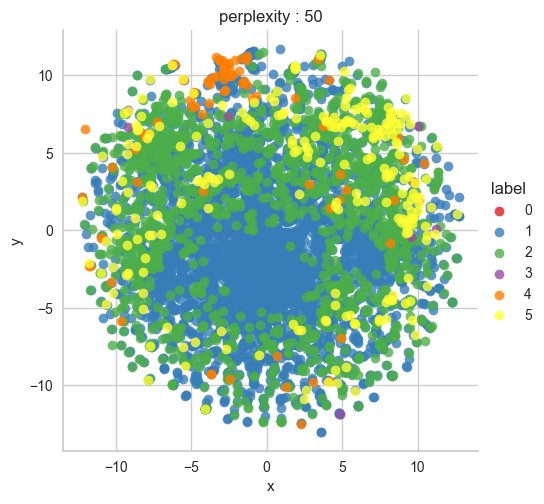

In [25]:
count_vectorizer = CountVectorizer()
x_count_vectorizer = count_vectorizer.fit_transform(df['text'])

kmeans = KMeans(n_clusters=6).fit(x_count_vectorizer.toarray())

start_time = time.time()
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(x_count_vectorizer)
print(time.time() - start_time, "s")

df_temp = pd.DataFrame({'x':tsne[:,0], 'y':tsne[:,1] ,'label':kmeans.labels_})

sns.lmplot(data=df_temp, x='x', y='y', hue='label', fit_reg=False, palette="Set1")
plt.title("perplexity : 50")
plt.show()

79.15970301628113 s


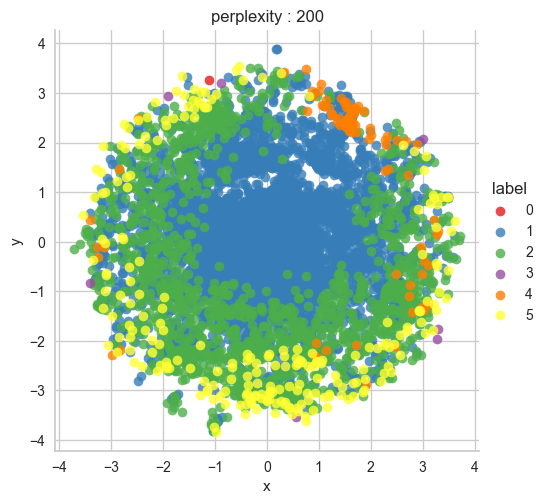

In [26]:
start_time = time.time()
tsne = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=200).fit_transform(x_count_vectorizer)
print(time.time() - start_time, "s")

df_temp = pd.DataFrame({'x':tsne[:,0], 'y':tsne[:,1] ,'label':kmeans.labels_})

sns.lmplot(data=df_temp, x='x', y='y', hue='label', fit_reg=False, palette="Set1")
plt.title("perplexity : 200")
plt.show()

38.647502183914185 s


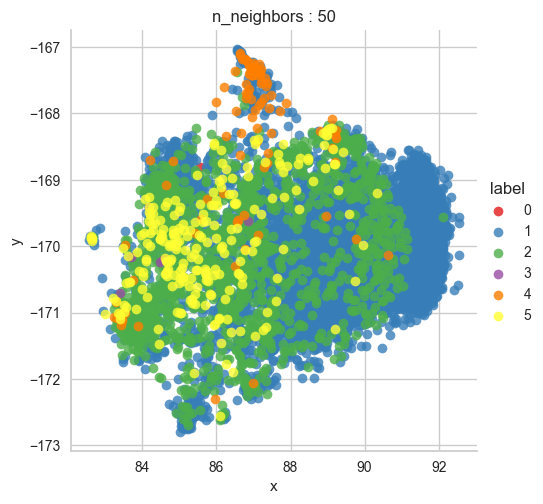

In [27]:
start_time = time.time()
fit = umap.UMAP(n_components=2, n_neighbors=50)
embedding = fit.fit_transform(x_count_vectorizer)
print(time.time() - start_time, "s")

df_temp = pd.DataFrame({'x':embedding[:,0], 'y':embedding[:,1] ,'label':kmeans.labels_})

sns.lmplot(data=df_temp, x='x', y='y', hue='label', fit_reg=False, palette="Set1")
plt.title("n_neighbors : 50")
plt.show()

70.46924352645874 s


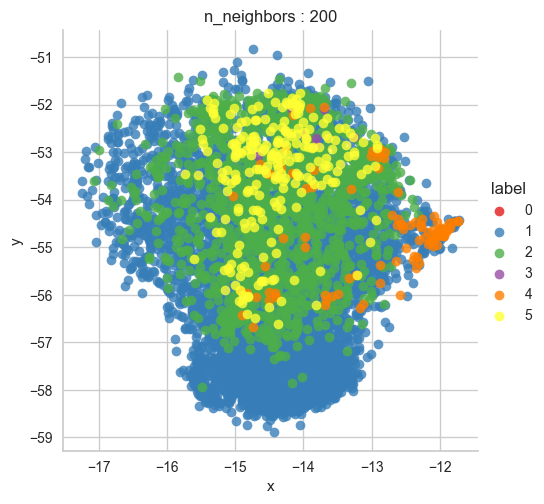

In [28]:
start_time = time.time()
fit = umap.UMAP(n_components=2, n_neighbors=200)
embedding = fit.fit_transform(x_count_vectorizer)
print(time.time() - start_time, "s")

df_temp = pd.DataFrame({'x':embedding[:,0], 'y':embedding[:,1] ,'label':kmeans.labels_})

sns.lmplot(data=df_temp, x='x', y='y', hue='label', fit_reg=False, palette="Set1")
plt.title("n_neighbors : 200")
plt.show()